# Notebook 5: Develop Convolutional Model

In this notebook, first, it will tokenize and pad the sentences into sequences. And then, it will develop different convolutional models by using Tensorflow and Keras.

# Tokenization and padding sequences

In [1]:
# read the csv file which stores sentence and numeric labels
import pandas as pd
df_sent_lab = pd.read_csv("dataset/sen_with_numeric_labels.csv")
df_sent_lab.head()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,sentences,labels
0,mothercare plc annual report accounts www,0
1,mothercareplc,0
2,com transformation growth,0
3,financial highlights worldwide network sales,0
4,group sales,0


In [2]:
# a short summary of the dataset "df_sent_lab"
sentcount = df_sent_lab["labels"].value_counts()
print("Print the sentiment summary of the dataset (1 = positive; 0 = neutral; negative = -1):")
print(sentcount)
print(f"\nIs there any missing and null value? Answer: {sentcount.isnull().sum()}")

Print the sentiment summary of the dataset (1 = positive; 0 = neutral; negative = -1):
labels
 1    396692
 0    301895
-1    205911
Name: count, dtype: int64

Is there any missing and null value? Answer: 0


After the above inital screening, it can tokenize the sentences and pad them as sequences.

In [3]:
# Import global nlp functions to tokenize the sentences and pad them as sequences
from nlp_functions import tokenize_pad_sequences

# Global parameters
num_words = 500 # max numbers of vocabulary 
oov_token = '<OOV>' # words that is out of the vocabulary
maxlen = 10 # max length of the sequences
padding = 'post' # padding position
truncating = 'post' # truncation position

# Extract the sentence from the dataset "df_sent_lab"
sentences = df_sent_lab["sentences"]

In [4]:
# Tokenize and padded the sentences
tokenizer, word_index, sequences, padded_sequences = tokenize_pad_sequences(sentences, 
                                                                            num_words, 
                                                                            oov_token, 
                                                                            maxlen,
                                                                            padding, 
                                                                            truncating)

2023-07-13 21:41:16.311393: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Using the global nlp function to visualise the padded sequences.

In [5]:
# Import global nlp functions for the summary
from nlp_functions import summary_tokpad

# Get the summary of the padded and tokenization for first 10 rows
summary = tokenize_pad_sequences(sentences, num_words, oov_token, maxlen, padding, truncating)
summary_tokpad(summary, 0, 10)

start index: 0
end index: 10
Summary of the tokenization and padding:

Selected Word Index:
<OOV>: 1
group: 2
financial: 3
year: 4
report: 5
company: 6
committee: 7
board: 8
directors: 9
business: 10

Selected Sentences:
[1, 25, 11, 5, 36, 1]
[1]
[395, 1, 81]
[3, 1, 1, 1, 57]
[2, 57]
[62, 253]
[26, 62, 71]
[166, 1]
[253]
[61, 223, 4, 249, 62, 253]

Selected Padded Sequences:
[ 1 25 11  5 36  1  0  0  0  0]
[1 0 0 0 0 0 0 0 0 0]
[395   1  81   0   0   0   0   0   0   0]
[ 3  1  1  1 57  0  0  0  0  0]
[ 2 57  0  0  0  0  0  0  0  0]
[ 62 253   0   0   0   0   0   0   0   0]
[26 62 71  0  0  0  0  0  0  0]
[166   1   0   0   0   0   0   0   0   0]
[253   0   0   0   0   0   0   0   0   0]
[ 61 223   4 249  62 253   0   0   0   0]


# Spliting the dataset

Split the dataset into X_training, X_test, Y_training and Y_test for modelling and validation. 
In details, X_training is training_sequences, X_test is testing_sequences, Y_training is training_labels, Y_test is testing_labels, respectively.

First, it splits the training sequences and testing sequences.

In [6]:
# parameters setting
training_size = 0.8
labels = df_sent_lab["labels"]
sequences = padded_sequences

# Split the sequences into training and testing dataset
from nlp_functions import split_the_dataset
training_sequences, testing_sequences = split_the_dataset(sequences, training_size)

In [7]:
# Print the training sequences dataset
print(f"There are {len(training_sequences)} in the training sequences data.")
print("The following are the training sequences: ")
print(training_sequences)

# Print the testing sequences dataset
print("")
print("")
print(f"There are {len(testing_sequences)} in the testing sequences data.")
print("The following are the testing sequences: ")
print(testing_sequences)

There are 723598 in the training sequences data.
The following are the training sequences: 
[[329   1   1 ... 207 208  22]
 [  1   1   1 ...   1   1   1]
 [ 74  78   1 ...  78   1 203]
 ...
 [ 50   1   1 ...   1   0   0]
 [126 238   1 ...   1   1  45]
 [  1   5 381 ...   0   0   0]]


There are 180900 in the testing sequences data.
The following are the testing sequences: 
[[128   0   0 ...   0   0   0]
 [249 188  19 ...  50 190 273]
 [  1   1   1 ...  23   1  16]
 ...
 [  1   1 201 ...  48   1   1]
 [  1   1   1 ...   1   1 214]
 [ 20  14  90 ...   0   0   0]]


Next, it splits the training lables and testing labels datasets.

In [8]:
# Split the labels into training and testing dataset
training_labels, testing_labels = split_the_dataset(labels, training_size)

In [9]:
# Print the training labels dataset
print(f"There are {len(training_labels)} in the training labels data.")
print("The following are the training labels: ")
print(training_labels)

# Print the testing labels dataset
print("")
print("")
print(f"There are {len(testing_labels)} in the testing labels data.")
print("The following are the testing labels: ")
print(testing_labels)

There are 723598 in the training labels data.
The following are the training labels: 
145206    1
488489    1
333331    1
658478    0
700643    0
         ..
259178    1
365838    0
131932    1
671155    1
121958    0
Name: labels, Length: 723598, dtype: int64


There are 180900 in the testing labels data.
The following are the testing labels: 
347497    0
840078    1
289955   -1
861028    1
901240    1
         ..
758540    1
7624     -1
313781    1
476891    1
240607    1
Name: labels, Length: 180900, dtype: int64


Before developing models, it sets up a global function to visualise the validation during the training and validation process.

In [10]:
import matplotlib.pyplot as plt

# Plot functions
def plot_graphs(model, string):
  plt.plot(model.history[string])
  plt.plot(model.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, GRU, Dense, Bidirectional
from tensorflow.keras.models import Sequential

Before specify the model definition, it should covert the label as one-hot encoded format. It can work with categorical_crossentropy loss function as this function only read labels at one-hot encoded format and it cannot process any negative value.

One-hot encoding: It is a process of converting the numeric categorical variables as binary vectors as follows:

-1 = [1,0,0]  
0 = [0,1,0]  
1 = [0,0,1]
. 

In [12]:
from tensorflow.keras.utils import to_categorical

# Convert target labels to one-hot encoding
training_labels_encoded = to_categorical(training_labels, num_classes=3)
testing_labels_encoded = to_categorical(testing_labels, num_classes=3)

Comment: The forth LSTM model "lstm_model_4" has a little enhancement of the training accuracy of 89.8% and validation accuracy of 83.9%. The total training time is approximate 1871 seconds (around 31 mins) for 30 epochs and 128 batch size. The trend of lowering training loss and increasing val_loss cannot be identified after the training. It indicates there is no overfitting problem of the model.

Grated Recurrent Units (GRUs) can be viewed as a simplied version of LSTM due to its simplified model structure such as fewer gates, single hidden state. 

The hyperparameter gru_dim specifies the number of units or dimensions in the GRU layer. Similar to the above LSTM layer, it has simplified architecture to learn dependencies in sequential data but it is not effective in capturing very long-term dependencies such as translation and speech recognition.

Remarks: Long-term dependencies can be defined as the relationship between earilier elements and later elements in the sequences. Since LSTM has memeory cells, it allows LSTM models to retain information over longer time than GRU.

Comment: The model "gru_model_1" has high training accuracy of 79% and validation accuracy of 78.2%. The total training time is approximate 696 seconds (around 11 mins) for 30 epochs and 128 batch size. The trend of lowering training loss and increasing val_loss cannot be identified after the training. It indicates there is no overfitting problem of the model.

# Convolution model

Convolutional model has CNN architecture which is good at capturing local patterns and short term partners. In sentiment analysis, CNN models is good at capturing the specific combination of words, n-grams, lingustic expression, etc. Due to its architecture, CNN train the model faster than RNN model. However, it cannot capture long-term dependencies such as contextual information in sentiment analysis. 

The hyperparameters filters can be seen as the learnable parameter sets that the convolutional layer will be applied to the input data. In each filter, it can extract local patterns. Increasing the filters hyperparameters can enhance the model complexity to capture diverse features. 

The kernal size can specify the dimensions of the convolutional filters on the input data. In general, it specifies the width of 1D convolutional filter. Large kernal size indicates large conext in the filter. In sentiment analysis, incrasing kernal size can capture wider range of neighboring words and more contextual information. 

## 1st Convolution Model 

In [23]:
# Hyperparameters
embedding_dim = 64 # each word will be represented by a dense vextor of specified size
filters = 64 # numbers of learnable parameters set
kernel_size = 10 # dimensions of the convolutional filters
dense_dim = 64 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [24]:
# Build the model
conv_model_1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Conv1D(filters, kernel_size, activation = 'relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the traiing parameters
conv_model_1.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Print the model summary
conv_model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 10, 64)            32000     
                                                                 
 conv1d_5 (Conv1D)           (None, 1, 64)             41024     
                                                                 
 global_average_pooling1d_5   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 3)                 195       
                                                                 
Total params: 77,379
Trainable params: 77,379
Non-trainable params: 0
__________________________________________________

In [25]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model 
conv_model_1 = conv_model_1.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 15s 3ms/step - loss: 0.5066 - accuracy: 0.7665 - val_loss: 0.4823 - val_accuracy: 0.7786
Epoch 2/30
5654/5654 [==============================] - 15s 3ms/step - loss: 0.4619 - accuracy: 0.7921 - val_loss: 0.4609 - val_accuracy: 0.7943
Epoch 3/30
5654/5654 [==============================] - 14s 2ms/step - loss: 0.4352 - accuracy: 0.8088 - val_loss: 0.4541 - val_accuracy: 0.8008
Epoch 4/30
5654/5654 [==============================] - 14s 2ms/step - loss: 0.4139 - accuracy: 0.8213 - val_loss: 0.4412 - val_accuracy: 0.8078
Epoch 5/30
5654/5654 [==============================] - 14s 3ms/step - loss: 0.3972 - accuracy: 0.8305 - val_loss: 0.4387 - val_accuracy: 0.8117
Epoch 6/30
5654/5654 [==============================] - 14s 2ms/step - loss: 0.3837 - accuracy: 0.8384 - val_loss: 0.4348 - val_accuracy: 0.8157
Epoch 7/30
5654/5654 [==============================] - 14s 2ms/step - loss: 0.3730 - accuracy: 0.8435 - val_loss: 0.4357 - val_ac

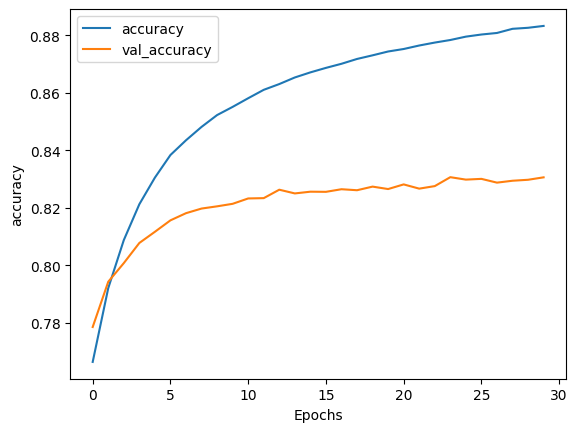

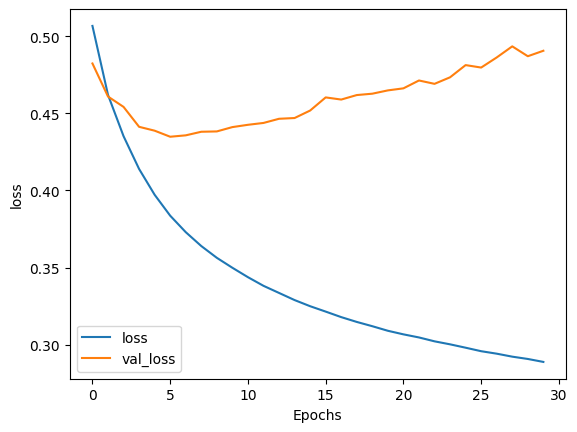

In [26]:
# Plot the accuracy and results 
plot_graphs(conv_model_1, "accuracy")
plot_graphs(conv_model_1, "loss")

Comment: The model conv_model_1 is overfitted although it has high training accuracy of 88.3% and validation accuracy of 83.1%. 

## 2nd Convolutional Model

In [27]:
# Hyperparameters
embedding_dim = 54 # each word will be represented by a dense vextor of specified size
filters = 54 # numbers of learnable parameters set
kernel_size = 10 # dimensions of the convolutional filters
dense_dim = 54 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [28]:
# Build the model
conv_model_2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Conv1D(filters, kernel_size, activation = 'relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the traiing parameters
conv_model_2.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Print the model summary
conv_model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 10, 54)            27000     
                                                                 
 conv1d_6 (Conv1D)           (None, 1, 54)             29214     
                                                                 
 global_average_pooling1d_6   (None, 54)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_12 (Dense)            (None, 54)                2970      
                                                                 
 dense_13 (Dense)            (None, 3)                 165       
                                                                 
Total params: 59,349
Trainable params: 59,349
Non-trainable params: 0
__________________________________________________

In [30]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model 
conv_model_2 = conv_model_2.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 14s 2ms/step - loss: 0.5095 - accuracy: 0.7642 - val_loss: 0.4871 - val_accuracy: 0.7764
Epoch 2/30
5654/5654 [==============================] - 14s 2ms/step - loss: 0.4672 - accuracy: 0.7875 - val_loss: 0.4668 - val_accuracy: 0.7881
Epoch 3/30
5654/5654 [==============================] - 13s 2ms/step - loss: 0.4438 - accuracy: 0.8022 - val_loss: 0.4564 - val_accuracy: 0.7966
Epoch 4/30
5654/5654 [==============================] - 13s 2ms/step - loss: 0.4249 - accuracy: 0.8137 - val_loss: 0.4481 - val_accuracy: 0.8031
Epoch 5/30
5654/5654 [==============================] - 13s 2ms/step - loss: 0.4104 - accuracy: 0.8221 - val_loss: 0.4439 - val_accuracy: 0.8082
Epoch 6/30
5654/5654 [==============================] - 13s 2ms/step - loss: 0.3985 - accuracy: 0.8289 - val_loss: 0.4421 - val_accuracy: 0.8103
Epoch 7/30
5654/5654 [==============================] - 13s 2ms/step - loss: 0.3889 - accuracy: 0.8340 - val_loss: 0.4380 - val_ac

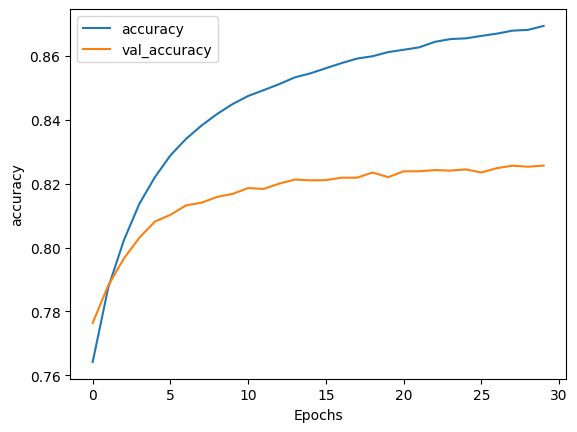

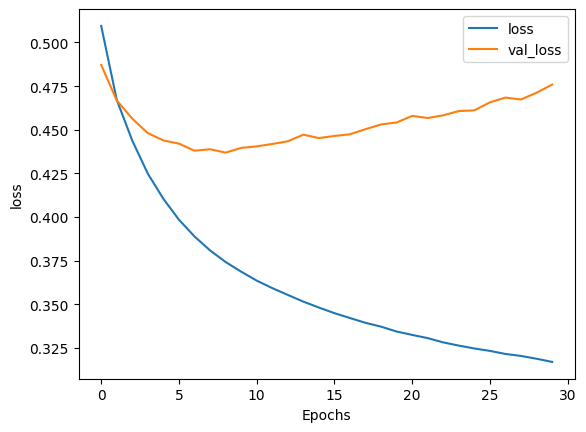

In [31]:
# Plot the accuracy and results 
plot_graphs(conv_model_2, "accuracy")
plot_graphs(conv_model_2, "loss")

Comment: The model conv_model_2 is overfitted although it has high training accuracy of 86.9% and validation accuracy of 82.6%. 

## 3rd Convolutional Model

In [32]:
# Hyperparameters
embedding_dim = 44 # each word will be represented by a dense vextor of specified size
filters = 44 # numbers of learnable parameters set
kernel_size = 10 # dimensions of the convolutional filters
dense_dim = 44 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [33]:
# Build the model
conv_model_3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Conv1D(filters, kernel_size, activation = 'relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the traiing parameters
conv_model_3.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Print the model summary
conv_model_3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 10, 44)            22000     
                                                                 
 conv1d_7 (Conv1D)           (None, 1, 44)             19404     
                                                                 
 global_average_pooling1d_7   (None, 44)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_14 (Dense)            (None, 44)                1980      
                                                                 
 dense_15 (Dense)            (None, 3)                 135       
                                                                 
Total params: 43,519
Trainable params: 43,519
Non-trainable params: 0
__________________________________________________

In [34]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model 
conv_model_3 = conv_model_3.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 13s 2ms/step - loss: 0.5130 - accuracy: 0.7634 - val_loss: 0.4873 - val_accuracy: 0.7749
Epoch 2/30
5654/5654 [==============================] - 13s 2ms/step - loss: 0.4715 - accuracy: 0.7846 - val_loss: 0.4725 - val_accuracy: 0.7858
Epoch 3/30
5654/5654 [==============================] - 12s 2ms/step - loss: 0.4520 - accuracy: 0.7971 - val_loss: 0.4615 - val_accuracy: 0.7927
Epoch 4/30
5654/5654 [==============================] - 12s 2ms/step - loss: 0.4367 - accuracy: 0.8067 - val_loss: 0.4551 - val_accuracy: 0.7969
Epoch 5/30
5654/5654 [==============================] - 12s 2ms/step - loss: 0.4245 - accuracy: 0.8140 - val_loss: 0.4506 - val_accuracy: 0.8011
Epoch 6/30
5654/5654 [==============================] - 13s 2ms/step - loss: 0.4150 - accuracy: 0.8194 - val_loss: 0.4513 - val_accuracy: 0.8024
Epoch 7/30
5654/5654 [==============================] - 12s 2ms/step - loss: 0.4074 - accuracy: 0.8238 - val_loss: 0.4489 - val_ac

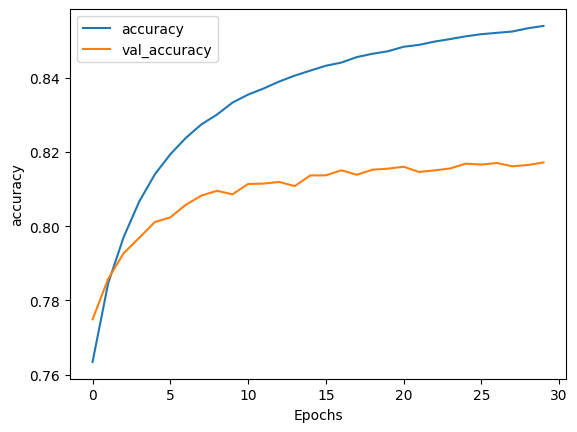

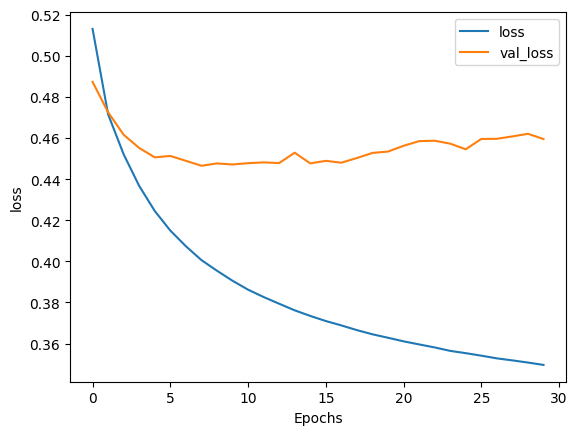

In [35]:
# Plot the accuracy and results 
plot_graphs(conv_model_3, "accuracy")
plot_graphs(conv_model_3, "loss")

Comment: The model conv_model_3 has high training accuracy of 85.4% and validation accuracy of 81.7%. No overfitting is identified. The total training time is 360 seconds (around 6 mins) for 30 epochs and 128 batch size.

## 4th Convolutional Model

In [36]:
# Hyperparameters
embedding_dim = 34 # each word will be represented by a dense vextor of specified size
filters = 34 # numbers of learnable parameters set
kernel_size = 10 # dimensions of the convolutional filters
dense_dim = 34 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [37]:
# Build the model
conv_model_4 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Conv1D(filters, kernel_size, activation = 'relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the traiing parameters
conv_model_4.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Print the model summary
conv_model_4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 10, 34)            17000     
                                                                 
 conv1d_8 (Conv1D)           (None, 1, 34)             11594     
                                                                 
 global_average_pooling1d_8   (None, 34)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_16 (Dense)            (None, 34)                1190      
                                                                 
 dense_17 (Dense)            (None, 3)                 105       
                                                                 
Total params: 29,889
Trainable params: 29,889
Non-trainable params: 0
__________________________________________________

In [38]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model 
conv_model_4 = conv_model_4.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 13s 2ms/step - loss: 0.5143 - accuracy: 0.7622 - val_loss: 0.4920 - val_accuracy: 0.7703
Epoch 2/30
5654/5654 [==============================] - 11s 2ms/step - loss: 0.4762 - accuracy: 0.7816 - val_loss: 0.4774 - val_accuracy: 0.7805
Epoch 3/30
5654/5654 [==============================] - 11s 2ms/step - loss: 0.4611 - accuracy: 0.7916 - val_loss: 0.4688 - val_accuracy: 0.7870
Epoch 4/30
5654/5654 [==============================] - 10s 2ms/step - loss: 0.4493 - accuracy: 0.7992 - val_loss: 0.4654 - val_accuracy: 0.7914
Epoch 5/30
5654/5654 [==============================] - 11s 2ms/step - loss: 0.4404 - accuracy: 0.8047 - val_loss: 0.4625 - val_accuracy: 0.7945
Epoch 6/30
5654/5654 [==============================] - 11s 2ms/step - loss: 0.4332 - accuracy: 0.8091 - val_loss: 0.4596 - val_accuracy: 0.7971
Epoch 7/30
5654/5654 [==============================] - 11s 2ms/step - loss: 0.4273 - accuracy: 0.8126 - val_loss: 0.4569 - val_ac

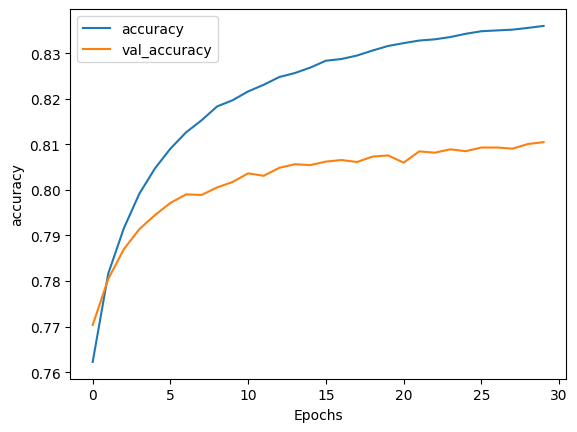

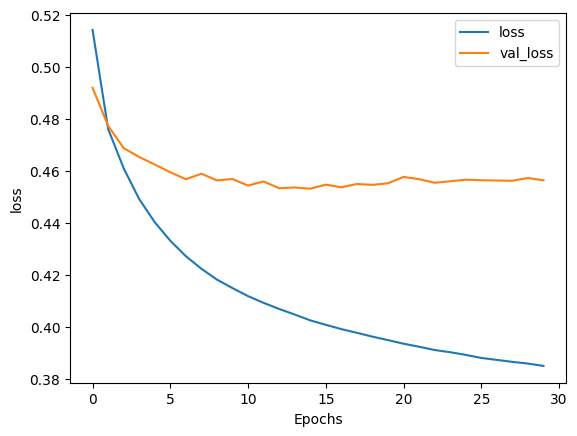

In [39]:
# Plot the accuracy and results 
plot_graphs(conv_model_4, "accuracy")
plot_graphs(conv_model_4, "loss")

Comment: The model conv_model_4 has high training accuracy of 83.6% and validation accuracy of 81.1%. No overfitting is identified. The total training time is 330 seconds (around 5 mins) for 30 epochs and 128 batch size.

## Model Optimization

The above model summary shows that the model conv_model_3 may be the best model. Next, it will optimize this model to find any replacement.

First, it will adjust embedding_dim hyperparameter.

## 3.1 Conv Model

In [40]:
# Hyperparameters
embedding_dim = 64 # each word will be represented by a dense vextor of specified size
filters = 44 # numbers of learnable parameters set
kernel_size = 10 # dimensions of the convolutional filters
dense_dim = 44 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [41]:
# Build the model
conv_model_3_1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Conv1D(filters, kernel_size, activation = 'relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the traiing parameters
conv_model_3_1.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Print the model summary
conv_model_3_1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 10, 64)            32000     
                                                                 
 conv1d_9 (Conv1D)           (None, 1, 44)             28204     
                                                                 
 global_average_pooling1d_9   (None, 44)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_18 (Dense)            (None, 44)                1980      
                                                                 
 dense_19 (Dense)            (None, 3)                 135       
                                                                 
Total params: 62,319
Trainable params: 62,319
Non-trainable params: 0
__________________________________________________

In [42]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model 
conv_model_3_1 = conv_model_3_1.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.5079 - accuracy: 0.7653 - val_loss: 0.4884 - val_accuracy: 0.7764
Epoch 2/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4670 - accuracy: 0.7873 - val_loss: 0.4657 - val_accuracy: 0.7885
Epoch 3/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4439 - accuracy: 0.8022 - val_loss: 0.4551 - val_accuracy: 0.7970
Epoch 4/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4254 - accuracy: 0.8138 - val_loss: 0.4481 - val_accuracy: 0.8026
Epoch 5/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4107 - accuracy: 0.8218 - val_loss: 0.4451 - val_accuracy: 0.8066
Epoch 6/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.3991 - accuracy: 0.8286 - val_loss: 0.4417 - val_accuracy: 0.8098
Epoch 7/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.3897 - accuracy: 0.8335 - val_loss: 0.4411 - val_accuracy:

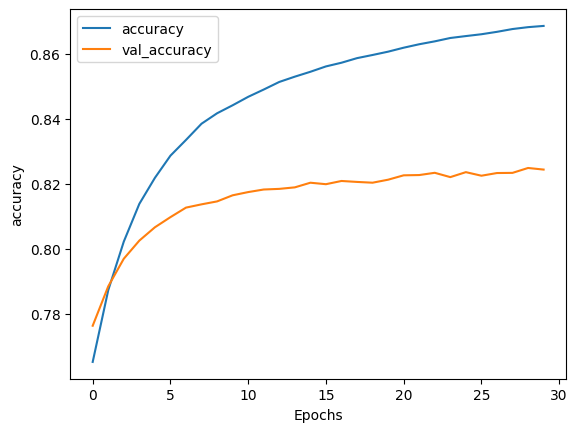

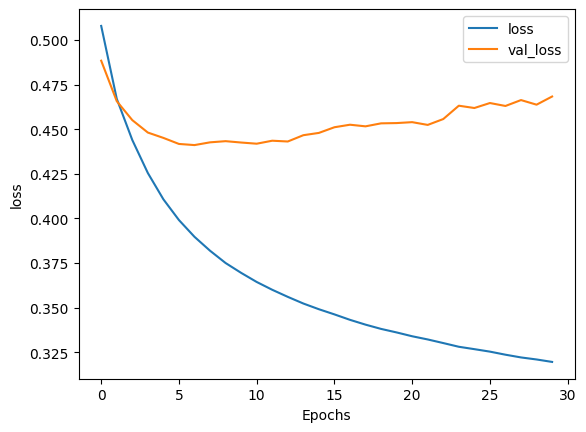

In [43]:
# Plot the accuracy and results 
plot_graphs(conv_model_3_1, "accuracy")
plot_graphs(conv_model_3_1, "loss")

Comment: The model conv_model_3_1 has high training accuracy of 86.9% and validation accuracy of 82.4%. No overfitting is identified. The total training time is 270 seconds (around 4 mins) for 30 epochs and 128 batch size.

## 3.2 Conv Model

In [44]:
# Hyperparameters
embedding_dim = 54 # each word will be represented by a dense vextor of specified size
filters = 44 # numbers of learnable parameters set
kernel_size = 10 # dimensions of the convolutional filters
dense_dim = 44 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [45]:
# Build the model
conv_model_3_2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Conv1D(filters, kernel_size, activation = 'relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the traiing parameters
conv_model_3_2.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Print the model summary
conv_model_3_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 10, 54)            27000     
                                                                 
 conv1d_10 (Conv1D)          (None, 1, 44)             23804     
                                                                 
 global_average_pooling1d_10  (None, 44)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_20 (Dense)            (None, 44)                1980      
                                                                 
 dense_21 (Dense)            (None, 3)                 135       
                                                                 
Total params: 52,919
Trainable params: 52,919
Non-trainable params: 0
_________________________________________________

In [46]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model 
conv_model_3_2 = conv_model_3_2.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 9s 1ms/step - loss: 0.5100 - accuracy: 0.7648 - val_loss: 0.4845 - val_accuracy: 0.7751
Epoch 2/30
5654/5654 [==============================] - 8s 1ms/step - loss: 0.4695 - accuracy: 0.7868 - val_loss: 0.4701 - val_accuracy: 0.7868
Epoch 3/30
5654/5654 [==============================] - 8s 1ms/step - loss: 0.4471 - accuracy: 0.8013 - val_loss: 0.4583 - val_accuracy: 0.7960
Epoch 4/30
5654/5654 [==============================] - 8s 1ms/step - loss: 0.4296 - accuracy: 0.8118 - val_loss: 0.4509 - val_accuracy: 0.8015
Epoch 5/30
5654/5654 [==============================] - 8s 1ms/step - loss: 0.4162 - accuracy: 0.8199 - val_loss: 0.4468 - val_accuracy: 0.8054
Epoch 6/30
5654/5654 [==============================] - 8s 1ms/step - loss: 0.4056 - accuracy: 0.8258 - val_loss: 0.4459 - val_accuracy: 0.8073
Epoch 7/30
5654/5654 [==============================] - 8s 1ms/step - loss: 0.3966 - accuracy: 0.8305 - val_loss: 0.4483 - val_accuracy:

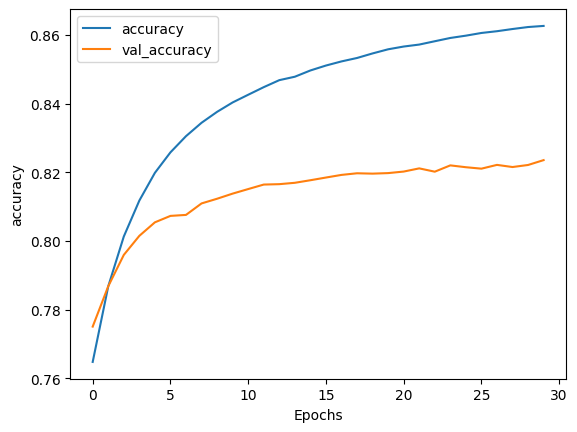

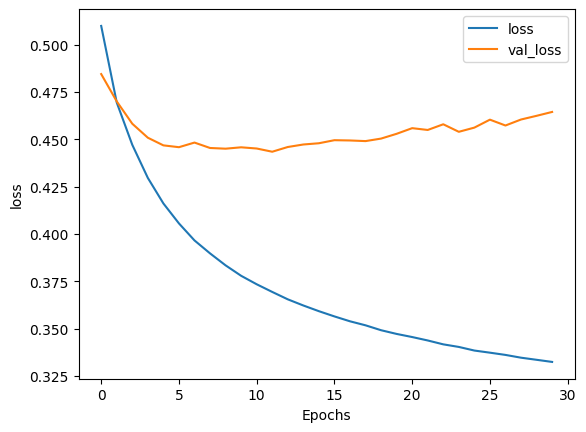

In [47]:
# Plot the accuracy and results 
plot_graphs(conv_model_3_2, "accuracy")
plot_graphs(conv_model_3_2, "loss")

Comment: The model conv_model_3_2 has high training accuracy of 86.3% and validation accuracy of 82.4%. No overfitting is identified. The total training time is 253 seconds (around 4 mins) for 30 epochs and 128 batch size.

## 3.3 Conv Model

In [48]:
# Hyperparameters
embedding_dim = 34 # each word will be represented by a dense vextor of specified size
filters = 44 # numbers of learnable parameters set
kernel_size = 10 # dimensions of the convolutional filters
dense_dim = 44 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [49]:
# Build the model
conv_model_3_3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Conv1D(filters, kernel_size, activation = 'relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the traiing parameters
conv_model_3_3.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Print the model summary
conv_model_3_3.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 10, 34)            17000     
                                                                 
 conv1d_11 (Conv1D)          (None, 1, 44)             15004     
                                                                 
 global_average_pooling1d_11  (None, 44)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_22 (Dense)            (None, 44)                1980      
                                                                 
 dense_23 (Dense)            (None, 3)                 135       
                                                                 
Total params: 34,119
Trainable params: 34,119
Non-trainable params: 0
_________________________________________________

In [50]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model 
conv_model_3_3 = conv_model_3_3.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 8s 1ms/step - loss: 0.5135 - accuracy: 0.7633 - val_loss: 0.4904 - val_accuracy: 0.7729
Epoch 2/30
5654/5654 [==============================] - 8s 1ms/step - loss: 0.4744 - accuracy: 0.7833 - val_loss: 0.4740 - val_accuracy: 0.7837
Epoch 3/30
5654/5654 [==============================] - 8s 1ms/step - loss: 0.4574 - accuracy: 0.7941 - val_loss: 0.4641 - val_accuracy: 0.7904
Epoch 4/30
5654/5654 [==============================] - 8s 1ms/step - loss: 0.4440 - accuracy: 0.8025 - val_loss: 0.4600 - val_accuracy: 0.7944
Epoch 5/30
5654/5654 [==============================] - 8s 1ms/step - loss: 0.4339 - accuracy: 0.8085 - val_loss: 0.4602 - val_accuracy: 0.7953
Epoch 6/30
5654/5654 [==============================] - 8s 1ms/step - loss: 0.4256 - accuracy: 0.8135 - val_loss: 0.4572 - val_accuracy: 0.7986
Epoch 7/30
5654/5654 [==============================] - 8s 1ms/step - loss: 0.4192 - accuracy: 0.8174 - val_loss: 0.4572 - val_accuracy:

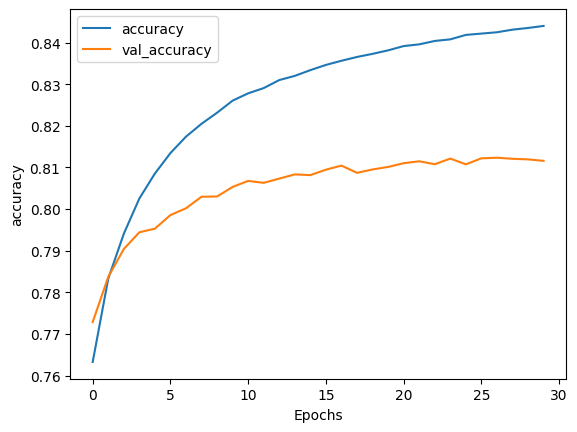

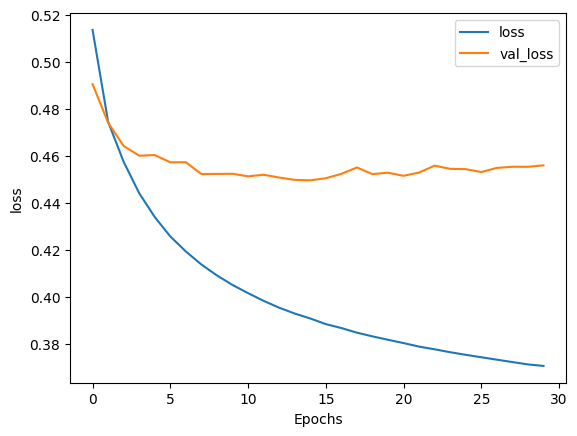

In [51]:
# Plot the accuracy and results 
plot_graphs(conv_model_3_3, "accuracy")
plot_graphs(conv_model_3_3, "loss")

Comment: The model conv_model_3_3 has high training accuracy of 84.4% and validation accuracy of 81.2%. No overfitting is identified. The total training time is 238 seconds (around 3 mins) for 30 epochs and 128 batch size.

After adjusting the embedding_dim hyperparameter, it shows that the model conv_model_3_1 can replace the model conv_model_3. It has higher accruacy and pass the validation test.

Summary of conv_model_3_1:
1. training accuracy: 86.9%
2. validation accuracy: 82.4%
3. validation test: PASS
4. total training time: 270 seconds (around 4 mins)

Next, it will adjust the filters hyperparameter.

## 3.4 Conv Model

In [53]:
# Hyperparameters
embedding_dim = 44 # each word will be represented by a dense vextor of specified size
filters = 64 # numbers of learnable parameters set
dense_dim = 44 # number of units intermediate dense layer
kernel_size = 10 # dimensions of the convolutional filters
maxlen = 10 # length of the input sequences

In [54]:
# Build the model
conv_model_3_4 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Conv1D(filters, kernel_size, activation = 'relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the traiing parameters
conv_model_3_4.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Print the model summary
conv_model_3_4.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 10, 44)            22000     
                                                                 
 conv1d_12 (Conv1D)          (None, 1, 64)             28224     
                                                                 
 global_average_pooling1d_12  (None, 64)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_24 (Dense)            (None, 44)                2860      
                                                                 
 dense_25 (Dense)            (None, 3)                 135       
                                                                 
Total params: 53,219
Trainable params: 53,219
Non-trainable params: 0
_________________________________________________

In [56]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model 
conv_model_3_4 = conv_model_3_4.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 10s 2ms/step - loss: 0.5087 - accuracy: 0.7644 - val_loss: 0.4835 - val_accuracy: 0.7776
Epoch 2/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4688 - accuracy: 0.7860 - val_loss: 0.4689 - val_accuracy: 0.7880
Epoch 3/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4466 - accuracy: 0.8004 - val_loss: 0.4594 - val_accuracy: 0.7952
Epoch 4/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4281 - accuracy: 0.8116 - val_loss: 0.4520 - val_accuracy: 0.8024
Epoch 5/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4136 - accuracy: 0.8202 - val_loss: 0.4474 - val_accuracy: 0.8048
Epoch 6/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4025 - accuracy: 0.8266 - val_loss: 0.4430 - val_accuracy: 0.8102
Epoch 7/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.3936 - accuracy: 0.8318 - val_loss: 0.4444 - val_accuracy

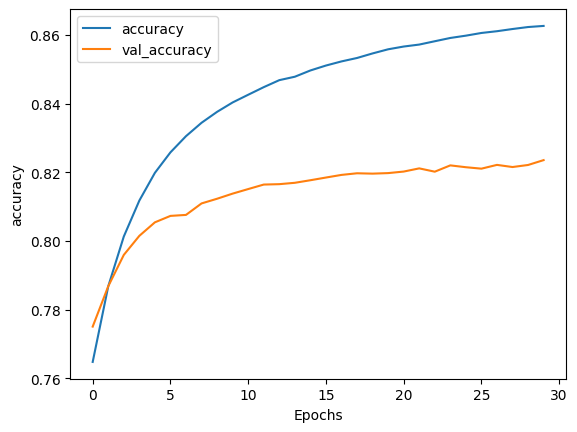

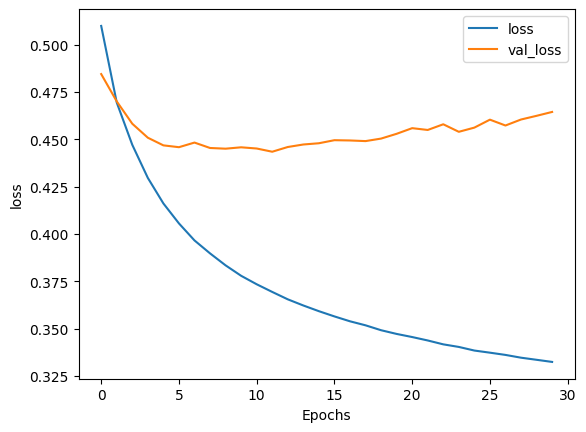

In [47]:
# Plot the accuracy and results 
plot_graphs(conv_model_3_4, "accuracy")
plot_graphs(conv_model_3_4, "loss")

Comment: The model conv_model_3_4 has high training accuracy of 86.5% and validation accuracy of 82.3%. No overfitting is identified. The total training time is 271 seconds (around 4 mins) for 30 epochs and 128 batch size.

## 3.5 Conv Model

In [57]:
# Hyperparameters
embedding_dim = 44 # each word will be represented by a dense vextor of specified size
filters = 54 # numbers of learnable parameters set
dense_dim = 44 # number of units intermediate dense layer
kernel_size = 10 # dimensions of the convolutional filters
maxlen = 10 # length of the input sequences

In [58]:
# Build the model
conv_model_3_5 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Conv1D(filters, kernel_size, activation = 'relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the traiing parameters
conv_model_3_5.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Print the model summary
conv_model_3_5.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 10, 44)            22000     
                                                                 
 conv1d_13 (Conv1D)          (None, 1, 54)             23814     
                                                                 
 global_average_pooling1d_13  (None, 54)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_26 (Dense)            (None, 44)                2420      
                                                                 
 dense_27 (Dense)            (None, 3)                 135       
                                                                 
Total params: 48,369
Trainable params: 48,369
Non-trainable params: 0
_________________________________________________

In [59]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model 
conv_model_3_5 = conv_model_3_5.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 10s 2ms/step - loss: 0.5104 - accuracy: 0.7641 - val_loss: 0.4902 - val_accuracy: 0.7742
Epoch 2/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4701 - accuracy: 0.7858 - val_loss: 0.4709 - val_accuracy: 0.7870
Epoch 3/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4493 - accuracy: 0.7991 - val_loss: 0.4607 - val_accuracy: 0.7938
Epoch 4/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4326 - accuracy: 0.8093 - val_loss: 0.4563 - val_accuracy: 0.7996
Epoch 5/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4194 - accuracy: 0.8169 - val_loss: 0.4486 - val_accuracy: 0.8023
Epoch 6/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4089 - accuracy: 0.8233 - val_loss: 0.4465 - val_accuracy: 0.8066
Epoch 7/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4006 - accuracy: 0.8280 - val_loss: 0.4447 - val_accuracy

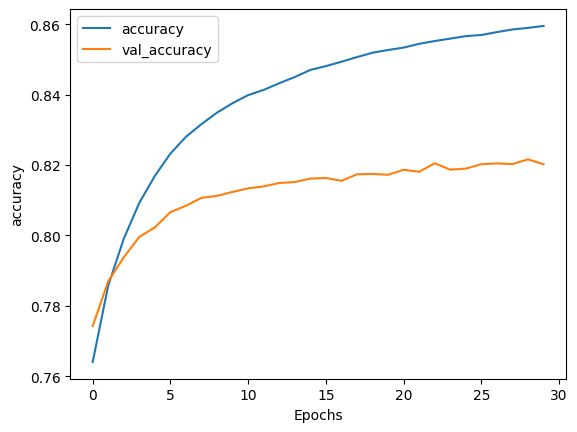

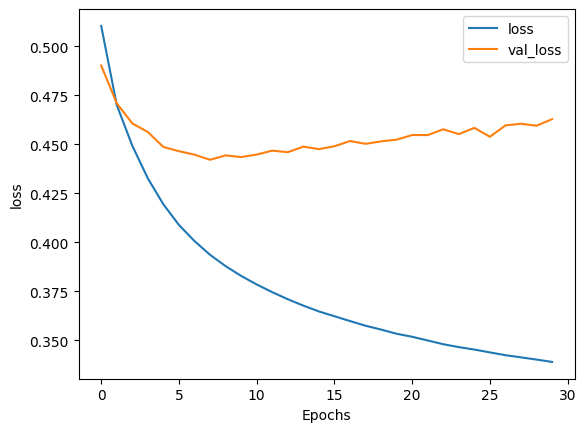

In [60]:
# Plot the accuracy and results 
plot_graphs(conv_model_3_5, "accuracy")
plot_graphs(conv_model_3_5, "loss")

Comment: The model conv_model_3_5 has high training accuracy of 86% and validation accuracy of 82%. No overfitting is identified. The total training time is 267 seconds (around 4 mins) for 30 epochs and 128 batch size.

# 3.6 Conv Model

In [61]:
# Hyperparameters
embedding_dim = 44 # each word will be represented by a dense vextor of specified size
filters = 34 # numbers of learnable parameters set
dense_dim = 44 # number of units intermediate dense layer
kernel_size = 10 # dimensions of the convolutional filters
maxlen = 10 # length of the input sequences

In [62]:
# Build the model
conv_model_3_6 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Conv1D(filters, kernel_size, activation = 'relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the traiing parameters
conv_model_3_6.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Print the model summary
conv_model_3_6.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 10, 44)            22000     
                                                                 
 conv1d_14 (Conv1D)          (None, 1, 34)             14994     
                                                                 
 global_average_pooling1d_14  (None, 34)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_28 (Dense)            (None, 44)                1540      
                                                                 
 dense_29 (Dense)            (None, 3)                 135       
                                                                 
Total params: 38,669
Trainable params: 38,669
Non-trainable params: 0
_________________________________________________

In [63]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model 
conv_model_3_6 = conv_model_3_6.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.5130 - accuracy: 0.7629 - val_loss: 0.4882 - val_accuracy: 0.7727
Epoch 2/30
5654/5654 [==============================] - 8s 2ms/step - loss: 0.4746 - accuracy: 0.7823 - val_loss: 0.4747 - val_accuracy: 0.7820
Epoch 3/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4574 - accuracy: 0.7930 - val_loss: 0.4665 - val_accuracy: 0.7888
Epoch 4/30
5654/5654 [==============================] - 8s 1ms/step - loss: 0.4432 - accuracy: 0.8020 - val_loss: 0.4594 - val_accuracy: 0.7939
Epoch 5/30
5654/5654 [==============================] - 8s 1ms/step - loss: 0.4321 - accuracy: 0.8089 - val_loss: 0.4560 - val_accuracy: 0.7969
Epoch 6/30
5654/5654 [==============================] - 8s 1ms/step - loss: 0.4235 - accuracy: 0.8140 - val_loss: 0.4533 - val_accuracy: 0.7999
Epoch 7/30
5654/5654 [==============================] - 8s 1ms/step - loss: 0.4167 - accuracy: 0.8180 - val_loss: 0.4538 - val_accuracy:

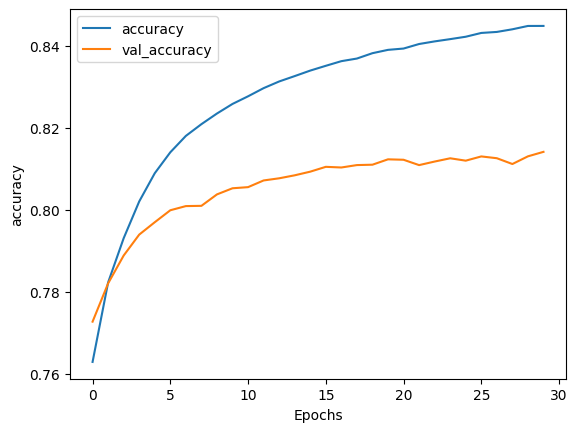

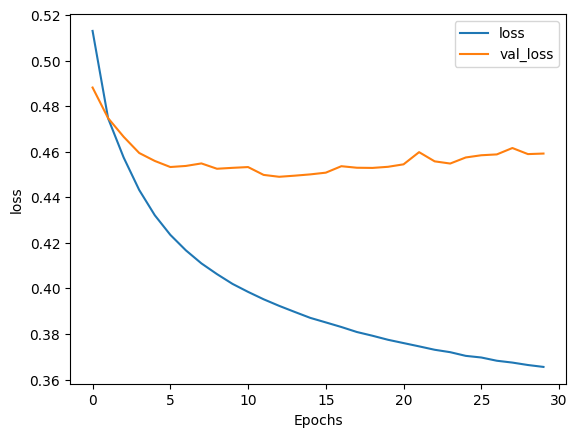

In [64]:
# Plot the accuracy and results 
plot_graphs(conv_model_3_6, "accuracy")
plot_graphs(conv_model_3_6, "loss")

Comment: The training accuracy of conv_model_3_6 has been decreased by 84%. Appearntly, it cannot be the best model.

# 3.7 Conv Model

In [65]:
# Hyperparameters
embedding_dim = 44 # each word will be represented by a dense vextor of specified size
filters = 44 # numbers of learnable parameters set
dense_dim = 64 # number of units intermediate dense layer
kernel_size = 10 # dimensions of the convolutional filters
maxlen = 10 # length of the input sequences

In [66]:
# Build the model
conv_model_3_7 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Conv1D(filters, kernel_size, activation = 'relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the traiing parameters
conv_model_3_7.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Print the model summary
conv_model_3_7.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 10, 44)            22000     
                                                                 
 conv1d_15 (Conv1D)          (None, 1, 44)             19404     
                                                                 
 global_average_pooling1d_15  (None, 44)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_30 (Dense)            (None, 64)                2880      
                                                                 
 dense_31 (Dense)            (None, 3)                 195       
                                                                 
Total params: 44,479
Trainable params: 44,479
Non-trainable params: 0
_________________________________________________

In [67]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model 
conv_model_3_7 = conv_model_3_7.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 10s 2ms/step - loss: 0.5106 - accuracy: 0.7639 - val_loss: 0.4841 - val_accuracy: 0.7762
Epoch 2/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4709 - accuracy: 0.7858 - val_loss: 0.4725 - val_accuracy: 0.7855
Epoch 3/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4506 - accuracy: 0.7988 - val_loss: 0.4605 - val_accuracy: 0.7945
Epoch 4/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4346 - accuracy: 0.8086 - val_loss: 0.4554 - val_accuracy: 0.7988
Epoch 5/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4225 - accuracy: 0.8157 - val_loss: 0.4502 - val_accuracy: 0.8024
Epoch 6/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4126 - accuracy: 0.8215 - val_loss: 0.4472 - val_accuracy: 0.8059
Epoch 7/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4046 - accuracy: 0.8259 - val_loss: 0.4471 - val_accuracy

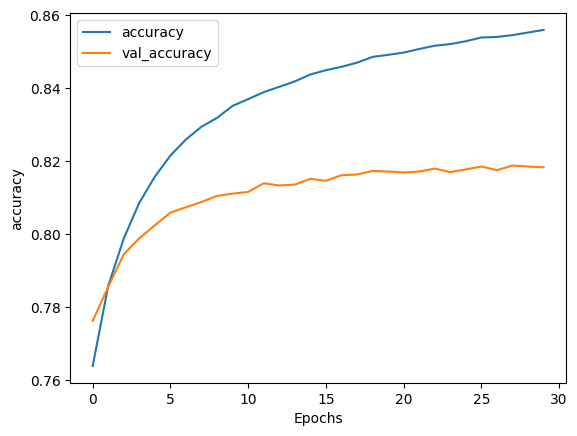

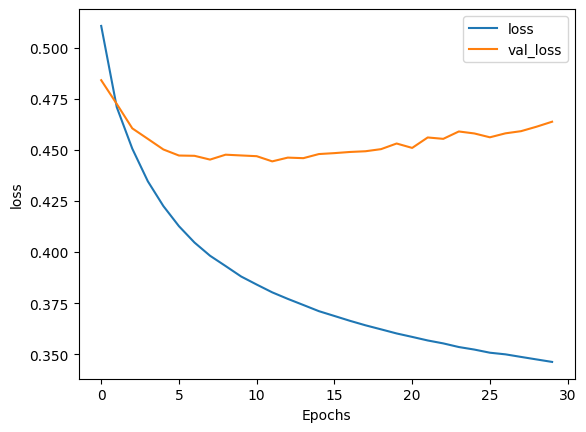

In [68]:
# Plot the accuracy and results 
plot_graphs(conv_model_3_7, "accuracy")
plot_graphs(conv_model_3_7, "loss")

Comment: The training accuracy of conv_model_3_7 has been decreased by 85.6%. It cannot be the best optimized model.

# 3.8 Conv Model

In [69]:
# Hyperparameters
embedding_dim = 44 # each word will be represented by a dense vextor of specified size
filters = 44 # numbers of learnable parameters set
dense_dim = 54 # number of units intermediate dense layer
kernel_size = 10 # dimensions of the convolutional filters
maxlen = 10 # length of the input sequences

In [70]:
# Build the model
conv_model_3_8 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Conv1D(filters, kernel_size, activation = 'relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the traiing parameters
conv_model_3_8.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Print the model summary
conv_model_3_8.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 10, 44)            22000     
                                                                 
 conv1d_16 (Conv1D)          (None, 1, 44)             19404     
                                                                 
 global_average_pooling1d_16  (None, 44)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_32 (Dense)            (None, 54)                2430      
                                                                 
 dense_33 (Dense)            (None, 3)                 165       
                                                                 
Total params: 43,999
Trainable params: 43,999
Non-trainable params: 0
_________________________________________________

In [71]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model 
conv_model_3_8 = conv_model_3_8.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 10s 2ms/step - loss: 0.5109 - accuracy: 0.7638 - val_loss: 0.4841 - val_accuracy: 0.7762
Epoch 2/30
5654/5654 [==============================] - 8s 1ms/step - loss: 0.4708 - accuracy: 0.7854 - val_loss: 0.4694 - val_accuracy: 0.7864
Epoch 3/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4504 - accuracy: 0.7984 - val_loss: 0.4601 - val_accuracy: 0.7926
Epoch 4/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4347 - accuracy: 0.8085 - val_loss: 0.4539 - val_accuracy: 0.7992
Epoch 5/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4225 - accuracy: 0.8157 - val_loss: 0.4486 - val_accuracy: 0.8029
Epoch 6/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4129 - accuracy: 0.8212 - val_loss: 0.4478 - val_accuracy: 0.8050
Epoch 7/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4054 - accuracy: 0.8253 - val_loss: 0.4466 - val_accuracy

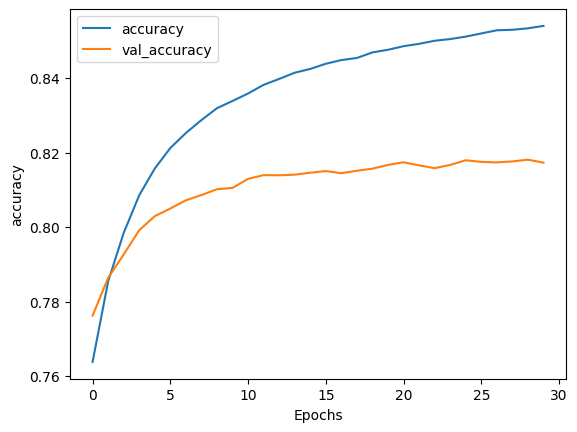

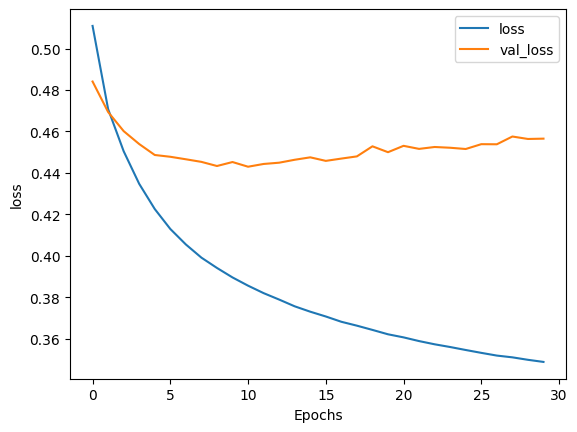

In [72]:
# Plot the accuracy and results 
plot_graphs(conv_model_3_8, "accuracy")
plot_graphs(conv_model_3_8, "loss")

Comment: The training accuracy of conv_model_3_8 has been decreased by 85.4%. It cannot be the best optimized model.

# 3.9 Conv Model

In [73]:
# Hyperparameters
embedding_dim = 44 # each word will be represented by a dense vextor of specified size
filters = 44 # numbers of learnable parameters set
dense_dim = 34 # number of units intermediate dense layer
kernel_size = 10 # dimensions of the convolutional filters
maxlen = 10 # length of the input sequences

In [74]:
# Build the model
conv_model_3_9 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Conv1D(filters, kernel_size, activation = 'relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the traiing parameters
conv_model_3_9.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Print the model summary
conv_model_3_9.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 10, 44)            22000     
                                                                 
 conv1d_17 (Conv1D)          (None, 1, 44)             19404     
                                                                 
 global_average_pooling1d_17  (None, 44)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_34 (Dense)            (None, 34)                1530      
                                                                 
 dense_35 (Dense)            (None, 3)                 105       
                                                                 
Total params: 43,039
Trainable params: 43,039
Non-trainable params: 0
_________________________________________________

In [75]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model 
conv_model_3_9 = conv_model_3_9.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 10s 2ms/step - loss: 0.5123 - accuracy: 0.7630 - val_loss: 0.4871 - val_accuracy: 0.7746
Epoch 2/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4727 - accuracy: 0.7845 - val_loss: 0.4773 - val_accuracy: 0.7811
Epoch 3/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4545 - accuracy: 0.7953 - val_loss: 0.4630 - val_accuracy: 0.7910
Epoch 4/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4392 - accuracy: 0.8051 - val_loss: 0.4583 - val_accuracy: 0.7960
Epoch 5/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4275 - accuracy: 0.8121 - val_loss: 0.4537 - val_accuracy: 0.7994
Epoch 6/30
5654/5654 [==============================] - 8s 1ms/step - loss: 0.4180 - accuracy: 0.8180 - val_loss: 0.4531 - val_accuracy: 0.8023
Epoch 7/30
5654/5654 [==============================] - 8s 1ms/step - loss: 0.4102 - accuracy: 0.8231 - val_loss: 0.4504 - val_accuracy

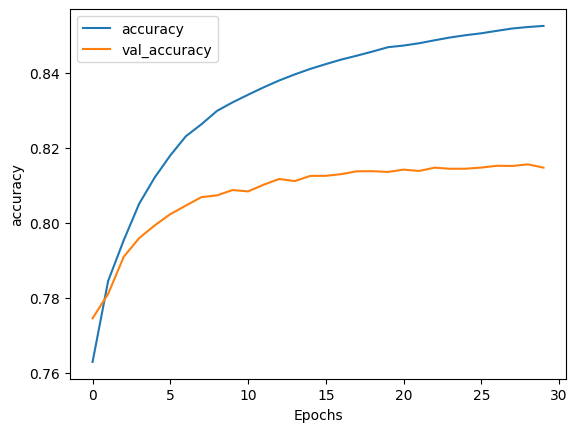

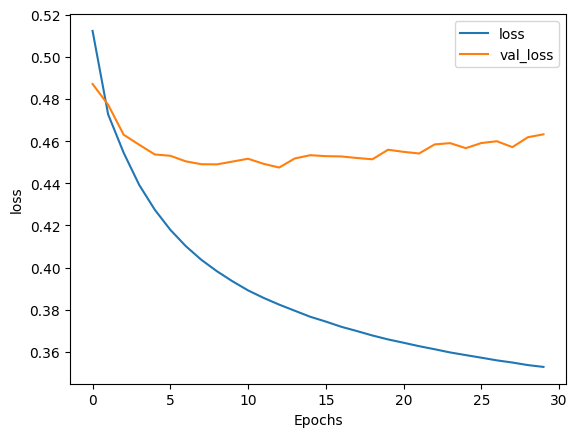

In [76]:
# Plot the accuracy and results 
plot_graphs(conv_model_3_9, "accuracy")
plot_graphs(conv_model_3_9, "loss")

Comment: The training accuracy of conv_model_3_9 has been decreased by 85.3%. It cannot be the best optimized model.

Next, it will attempt to adjust different hyperparameters while the embedding_dim parameter will be set as 64 only.

# 3.10 Conv Model

In [78]:
# Hyperparameters
embedding_dim = 64 # each word will be represented by a dense vextor of specified size
filters = 54 # numbers of learnable parameters set
kernel_size = 10 # dimensions of the convolutional filters
dense_dim = 44 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [79]:
# Build the model
conv_model_3_10 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Conv1D(filters, kernel_size, activation = 'relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the traiing parameters
conv_model_3_10.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Print the model summary
conv_model_3_10.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 10, 64)            32000     
                                                                 
 conv1d_18 (Conv1D)          (None, 1, 54)             34614     
                                                                 
 global_average_pooling1d_18  (None, 54)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_36 (Dense)            (None, 44)                2420      
                                                                 
 dense_37 (Dense)            (None, 3)                 135       
                                                                 
Total params: 69,169
Trainable params: 69,169
Non-trainable params: 0
_________________________________________________

In [80]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model 
conv_model_3_10 = conv_model_3_10.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 10s 2ms/step - loss: 0.5078 - accuracy: 0.7648 - val_loss: 0.4848 - val_accuracy: 0.7745
Epoch 2/30
5654/5654 [==============================] - 10s 2ms/step - loss: 0.4662 - accuracy: 0.7880 - val_loss: 0.4669 - val_accuracy: 0.7884
Epoch 3/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4413 - accuracy: 0.8038 - val_loss: 0.4535 - val_accuracy: 0.7973
Epoch 4/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4214 - accuracy: 0.8159 - val_loss: 0.4460 - val_accuracy: 0.8040
Epoch 5/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4052 - accuracy: 0.8254 - val_loss: 0.4410 - val_accuracy: 0.8103
Epoch 6/30
5654/5654 [==============================] - 10s 2ms/step - loss: 0.3924 - accuracy: 0.8324 - val_loss: 0.4384 - val_accuracy: 0.8128
Epoch 7/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.3823 - accuracy: 0.8374 - val_loss: 0.4403 - val_accura

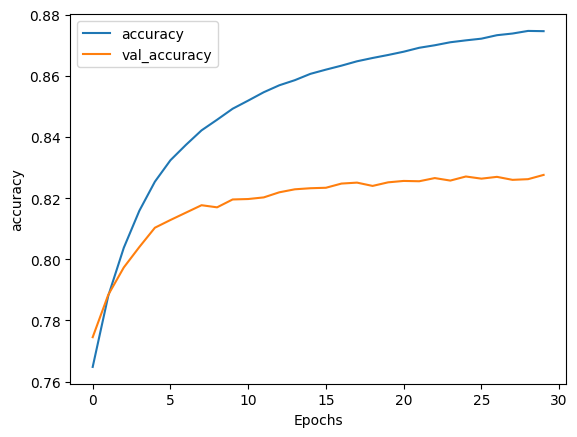

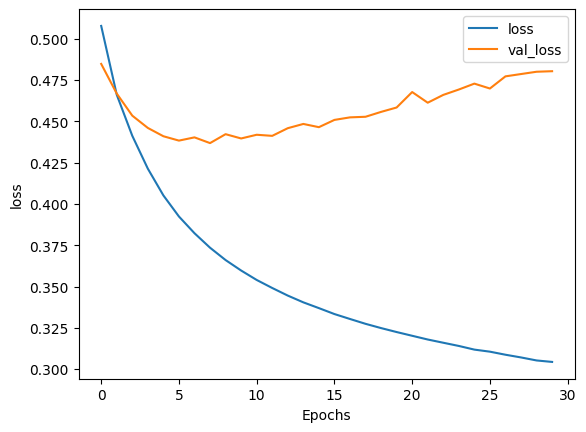

In [81]:
# Plot the accuracy and results 
plot_graphs(conv_model_3_10, "accuracy")
plot_graphs(conv_model_3_10, "loss")

Comment: It has a little increasing trend of the validation accuracy. The model conv_model_3_10 is slightly overfitted. 

# 3.11 Conv Model

In [84]:
# Hyperparameters
embedding_dim = 64 # each word will be represented by a dense vextor of specified size
filters = 44 # numbers of learnable parameters set
kernel_size = 10 # dimensions of the convolutional filters
dense_dim = 54 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [85]:
# Build the model
conv_model_3_11 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Conv1D(filters, kernel_size, activation = 'relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the traiing parameters
conv_model_3_11.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Print the model summary
conv_model_3_11.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_20 (Embedding)    (None, 10, 64)            32000     
                                                                 
 conv1d_20 (Conv1D)          (None, 1, 44)             28204     
                                                                 
 global_average_pooling1d_20  (None, 44)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_40 (Dense)            (None, 54)                2430      
                                                                 
 dense_41 (Dense)            (None, 3)                 165       
                                                                 
Total params: 62,799
Trainable params: 62,799
Non-trainable params: 0
_________________________________________________

In [86]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model 
conv_model_3_11 = conv_model_3_11.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 10s 2ms/step - loss: 0.5095 - accuracy: 0.7650 - val_loss: 0.4832 - val_accuracy: 0.7762
Epoch 2/30
5654/5654 [==============================] - 10s 2ms/step - loss: 0.4666 - accuracy: 0.7883 - val_loss: 0.4652 - val_accuracy: 0.7894
Epoch 3/30
5654/5654 [==============================] - 10s 2ms/step - loss: 0.4440 - accuracy: 0.8022 - val_loss: 0.4554 - val_accuracy: 0.7967
Epoch 4/30
5654/5654 [==============================] - 10s 2ms/step - loss: 0.4255 - accuracy: 0.8136 - val_loss: 0.4479 - val_accuracy: 0.8035
Epoch 5/30
5654/5654 [==============================] - 10s 2ms/step - loss: 0.4109 - accuracy: 0.8222 - val_loss: 0.4473 - val_accuracy: 0.8063
Epoch 6/30
5654/5654 [==============================] - 10s 2ms/step - loss: 0.3996 - accuracy: 0.8286 - val_loss: 0.4475 - val_accuracy: 0.8101
Epoch 7/30
5654/5654 [==============================] - 10s 2ms/step - loss: 0.3903 - accuracy: 0.8332 - val_loss: 0.4438 - val_ac

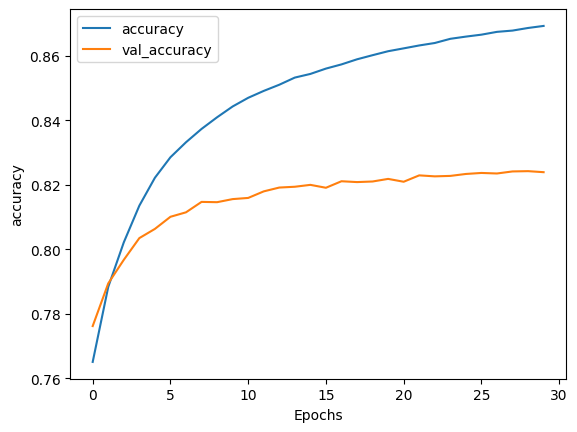

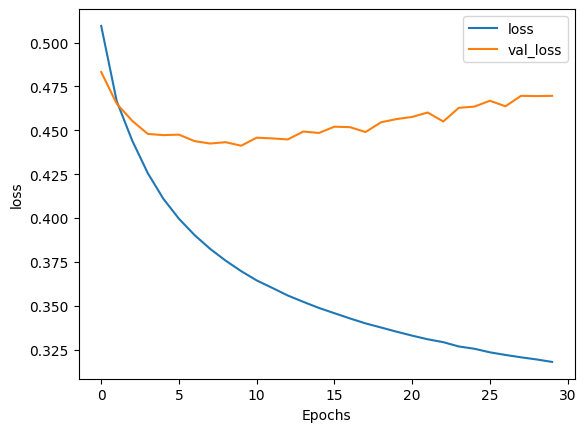

In [87]:
# Plot the accuracy and results 
plot_graphs(conv_model_3_11, "accuracy")
plot_graphs(conv_model_3_11, "loss")

Comment: The performance of this conv_model_3_11 is similar with the conv_model_3_1.

# 3.12 Conv Model

In [88]:
# Hyperparameters
embedding_dim = 64 # each word will be represented by a dense vextor of specified size
filters = 44 # numbers of learnable parameters set
kernel_size = 10 # dimensions of the convolutional filters
dense_dim = 34 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [89]:
# Build the model
conv_model_3_12 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Conv1D(filters, kernel_size, activation = 'relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the traiing parameters
conv_model_3_12.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Print the model summary
conv_model_3_12.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_21 (Embedding)    (None, 10, 64)            32000     
                                                                 
 conv1d_21 (Conv1D)          (None, 1, 44)             28204     
                                                                 
 global_average_pooling1d_21  (None, 44)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_42 (Dense)            (None, 34)                1530      
                                                                 
 dense_43 (Dense)            (None, 3)                 105       
                                                                 
Total params: 61,839
Trainable params: 61,839
Non-trainable params: 0
_________________________________________________

In [90]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model 
conv_model_3_12 = conv_model_3_12.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 10s 2ms/step - loss: 0.5112 - accuracy: 0.7643 - val_loss: 0.4840 - val_accuracy: 0.7769
Epoch 2/30
5654/5654 [==============================] - 10s 2ms/step - loss: 0.4676 - accuracy: 0.7877 - val_loss: 0.4721 - val_accuracy: 0.7876
Epoch 3/30
5654/5654 [==============================] - 10s 2ms/step - loss: 0.4449 - accuracy: 0.8024 - val_loss: 0.4587 - val_accuracy: 0.7961
Epoch 4/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4266 - accuracy: 0.8133 - val_loss: 0.4491 - val_accuracy: 0.8023
Epoch 5/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4124 - accuracy: 0.8211 - val_loss: 0.4447 - val_accuracy: 0.8058
Epoch 6/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4011 - accuracy: 0.8278 - val_loss: 0.4422 - val_accuracy: 0.8097
Epoch 7/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.3920 - accuracy: 0.8326 - val_loss: 0.4438 - val_accura

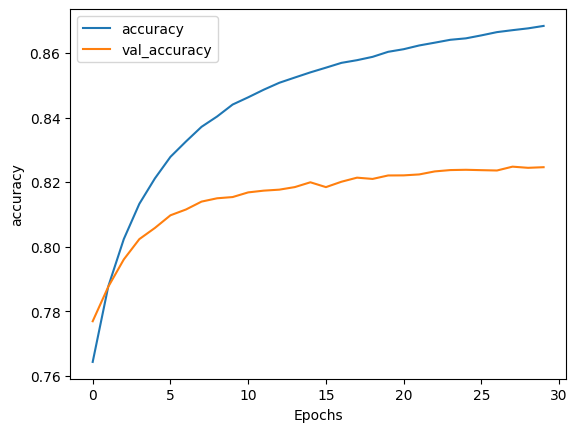

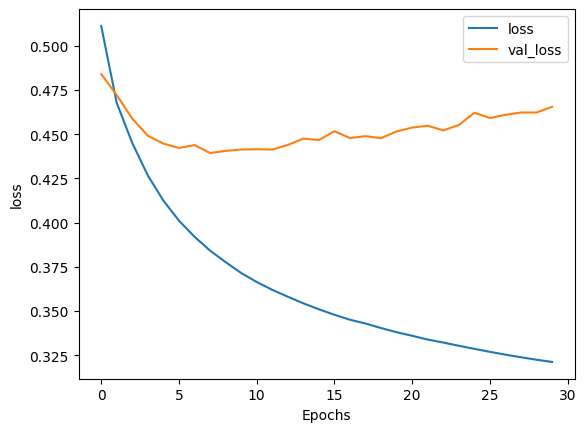

In [91]:
# Plot the accuracy and results 
plot_graphs(conv_model_3_12, "accuracy")
plot_graphs(conv_model_3_12, "loss")

Comment: The performance of this conv_model_3_12 is similar with the conv_model_3_1, including the training time.

Overall, conv_model_3_1 is the best model after model optimization.